In [60]:
# imports: most likely matplotlib and sklearn :)
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [61]:
def load_img_to_floatarray(image_path):
    """Loads a jpg image as a matrix of shape (n,m,3) where
    n and m are the height and width of the image. Returns a
    numpy array of dtype float."""
    # just the easiest way to do this in this scenario
    # there are more sophisticated libraries for this
    # e.g. CV2 or Pillow, also scipy has a function
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
   
    return image

In [62]:
def transform_img_KMeans(image, n_clust):
    # define criteria to stop
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    # calculate k means cluster
    _, labels, (centers) = cv2.kmeans(pixel_values, n_clust, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # replace data points with cluster centers
    centers = np.uint8(centers)
    labels = labels.flatten()
    
    # return reshaped image
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image

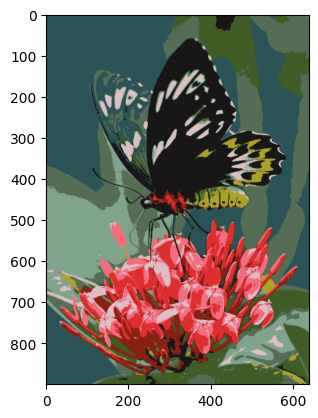

In [63]:
# load images
image = load_img_to_floatarray("butterfly.jpg")
segmented_image = transform_img_KMeans(image, 10)
plt.imshow(segmented_image)
plt.show()

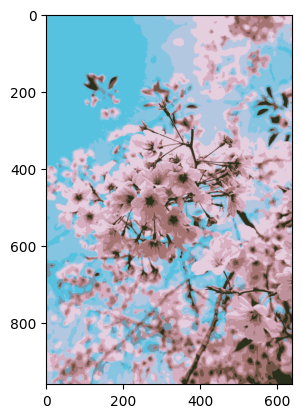

In [64]:
# load image 
image = load_img_to_floatarray("flower.jpg")
segmented_image = transform_img_KMeans(image, 10)
plt.imshow(segmented_image)
plt.show()

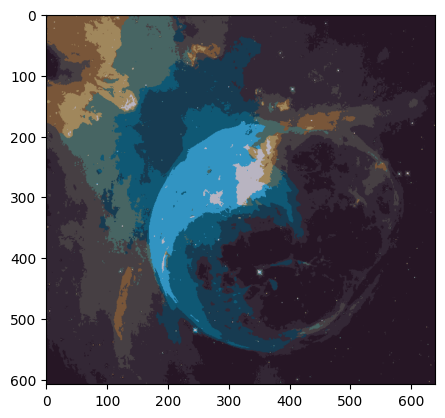

In [65]:
# load image 
image = load_img_to_floatarray("nasa.jpg")
segmented_image = transform_img_KMeans(image, 10)
plt.imshow(segmented_image)
plt.show()

## k-means based compression

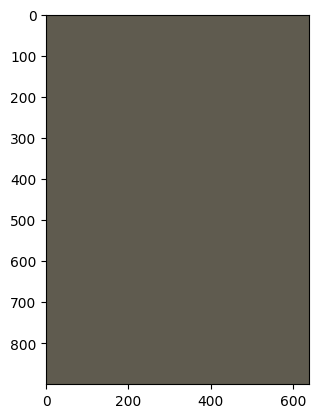

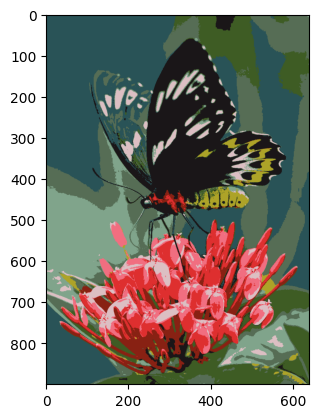

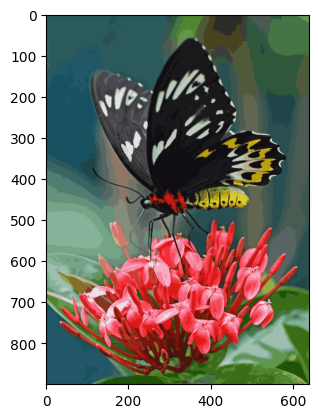

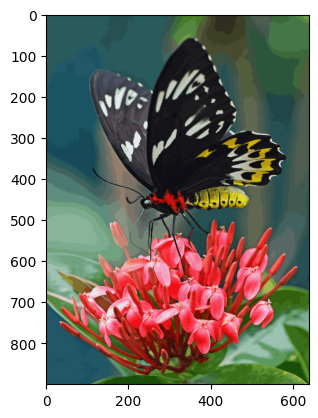

'\nDie Kompression funktioniert, da wir praktisch aus einem Datenzentrum einen Punkt machen.\nSo wird dann die Anzahl an Daten (RGB-Values), die für das Bild verwendet werden, verringert.\nWenn wir z.B. ein Datenzentrum haben, hat alles die gleiche Farbe (siehe unten)\n'

In [66]:
# clusters 1, 10, 50, 100
# visualize results
image = load_img_to_floatarray("butterfly.jpg")
segmented_image = transform_img_KMeans(image, 1)
plt.imshow(segmented_image)
plt.show()

image = load_img_to_floatarray("butterfly.jpg")
segmented_image = transform_img_KMeans(image, 10)
plt.imshow(segmented_image)
plt.show()

image = load_img_to_floatarray("butterfly.jpg")
segmented_image = transform_img_KMeans(image, 50)
plt.imshow(segmented_image)
plt.show()

image = load_img_to_floatarray("butterfly.jpg")
segmented_image = transform_img_KMeans(image, 100)
plt.imshow(segmented_image)
plt.show()
# explain why compression works
"""
Die Kompression funktioniert, da wir praktisch aus einem Datenzentrum einen Punkt machen.
So wird dann die Anzahl an Daten (RGB-Values), die für das Bild verwendet werden, verringert.
Wenn wir z.B. ein Datenzentrum haben, hat alles die gleiche Farbe (siehe unten)
"""

## PCA based compression

In [67]:
def transform_img_PCA(img, n_comps):
    # transform image into data matrix with 3m features
    blue,green,red = cv2.split(img)
    df_blue = blue/255
    df_green = green/255
    df_red = red/255
    
    # get principal components (fit PCA)
    pca_b = PCA(n_components=n_comps)
    pca_b.fit(df_blue)
    trans_pca_b = pca_b.transform(df_blue)
    
    pca_g = PCA(n_components=n_comps)
    pca_g.fit(df_green)
    trans_pca_g = pca_g.transform(df_green)

    pca_r = PCA(n_components=n_comps)
    pca_r.fit(df_red)
    trans_pca_r = pca_r.transform(df_red)
    
    # inverse transform to full dimensions
    b_arr = pca_b.inverse_transform(trans_pca_b)
    g_arr = pca_g.inverse_transform(trans_pca_g)
    r_arr = pca_r.inverse_transform(trans_pca_r)
    
    # find dimension reduced representation of data matrix
    compressed_image = (cv2.merge((b_arr, g_arr, r_arr)))
    return compressed_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


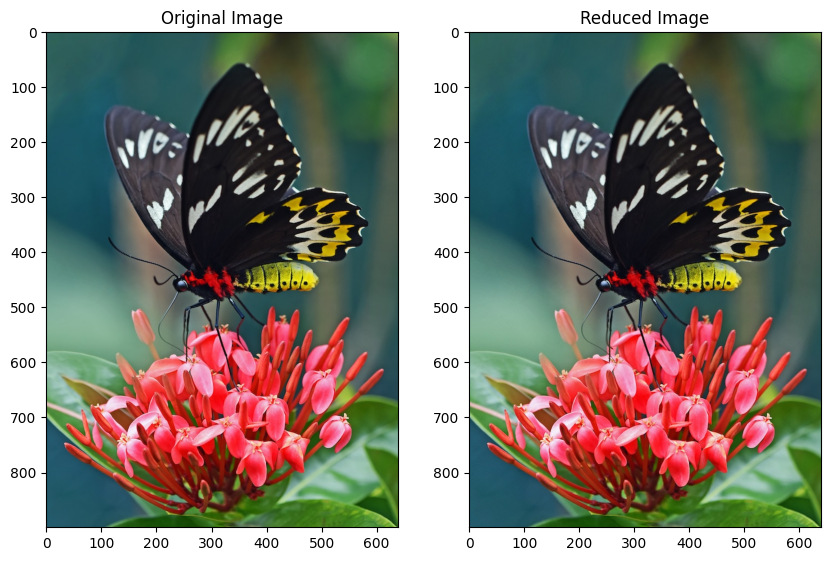

'\nEs werden die "Hauptkomponenten" identifiziert und dann für das Bild genutzt.\nDiese Hauptkomponenten sind Linearkombinationen der ursprünglichen Pixelwerte und ermöglichen eine effiziente Kompression, \nda redundante Informationen eliminiert werden.\n'

In [68]:
# try out different number of principal components
img = load_img_to_floatarray("butterfly.jpg")
img_reduced = transform_img_PCA(img, 300)
# how many components do we need for a really good compression?
"""
Das Bild sieht jetzt aus, wie das andere Bild, aber irgendwie anders als das Original.
Glaube sonst, dass man so ca. 500 Komponenten für eine gute Kompression braucht, je nach originaler Bildqualität.
"""

# visualize results
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

# explain why compression works
"""
Es werden die "Hauptkomponenten" identifiziert und dann für das Bild genutzt.
Diese Hauptkomponenten sind Linearkombinationen der ursprünglichen Pixelwerte und ermöglichen eine effiziente Kompression, 
da redundante Informationen eliminiert werden.
"""